In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from fbprophet import Prophet
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

data =pd.read_excel('C:/Users/bran/Desktop/hist/saat2017.xlsx','Hoja1')
display(data.head())

,ds,y
0,2017-01-01 00:00:00,0
1,2017-01-01 01:00:00,0
2,2017-01-01 02:00:00,1
3,2017-01-01 03:00:00,1
4,2017-01-01 04:00:00,0


In [17]:
data.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [18]:
data.describe()

,y
count,9504.000000
mean,3.571338
std,3.171277
min,0.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,22.000000


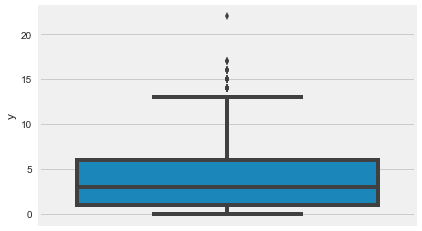

In [19]:
sns.boxplot(y="y", data=data);
sns.plt.show()

In [20]:
X = pd.DataFrame(index=range(0,len(data)))
X['ds'] = data['ds'].values
X['y'] = data['y'].values
X.tail()

,ds,y
9499,2018-01-31 19:00:00,4
9500,2018-01-31 20:00:00,11
9501,2018-01-31 21:00:00,2
9502,2018-01-31 22:00:00,1
9503,2018-01-31 23:00:00,0


In [21]:
recent = X[X.ds > '2016-01-01']
model_recent = Prophet(yearly_seasonality=True)
model_recent.fit(recent)
future_recent = model_recent.make_future_dataframe(periods=24*59, freq='H')
forecast_recent = model_recent.predict(future_recent)
#N = 28*24
#m = Prophet(yearly_seasonality=True)
#m.fit(X)
#future = m.make_future_dataframe(freq='H',periods=N)
future_recent.tail(7)

,ds
10913,2018-03-31 17:00:00
10914,2018-03-31 18:00:00
10915,2018-03-31 19:00:00
10916,2018-03-31 20:00:00
10917,2018-03-31 21:00:00
10918,2018-03-31 22:00:00
10919,2018-03-31 23:00:00


In [22]:
forecast = model_recent.predict(future_recent)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
10915,2018-03-31 19:00:00,5.374878,2.541986,8.295709
10916,2018-03-31 20:00:00,4.931229,2.094204,7.806880
10917,2018-03-31 21:00:00,3.783445,0.918159,6.654046
10918,2018-03-31 22:00:00,2.296499,-0.425957,5.163493
10919,2018-03-31 23:00:00,1.079193,-1.936300,3.972814


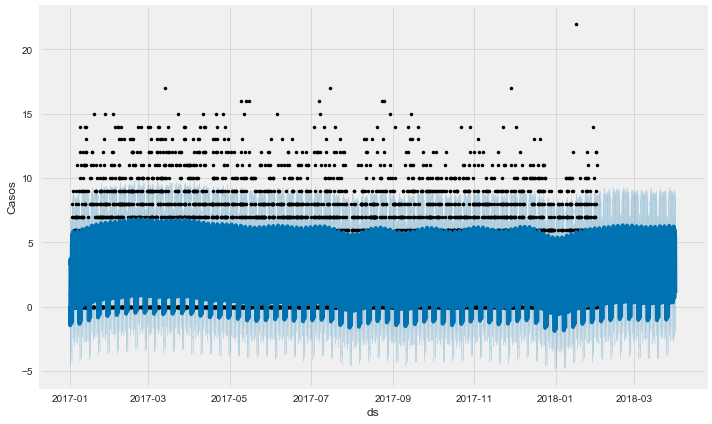

In [23]:
model_recent.plot(forecast,ylabel='Casos');

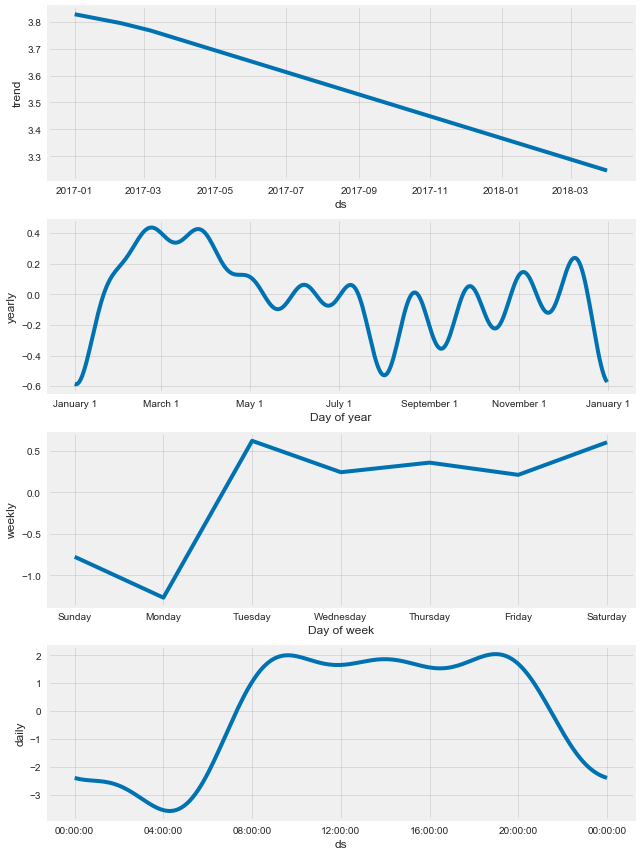

In [24]:
model_recent.plot_components(forecast);  

In [16]:
from pandas import ExcelWriter

writer = ExcelWriter('feb-mar18.xlsx')
forecast.to_excel(writer,'Sheet1')
writer.save()